In [1]:
import numpy as np
import pandas as pd
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
# to have a clean notebook
import warnings
warnings.filterwarnings('ignore')


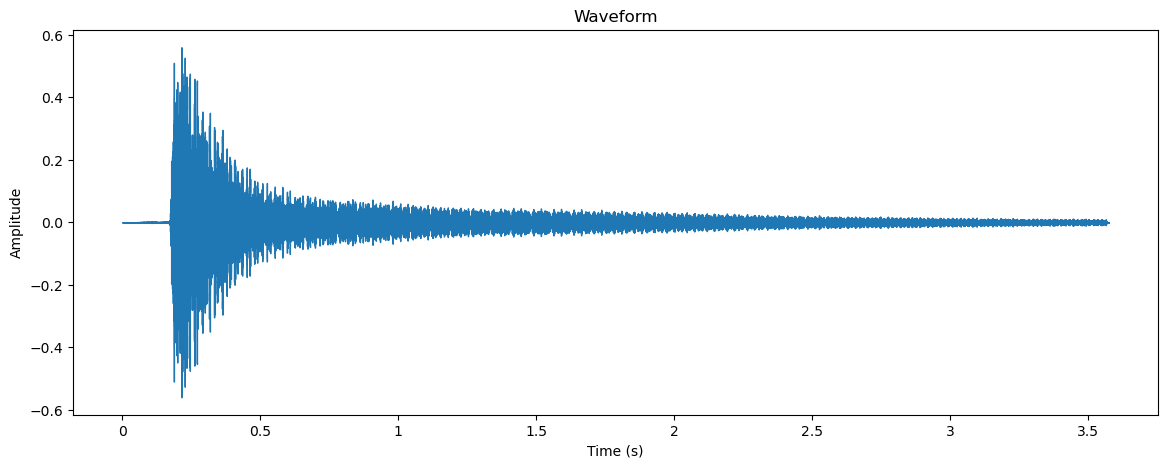

In [2]:
#extra
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

test_filename = 'E:/Github Repositories/BharatIntern/major_project/New_Dataset/A_Minor.mp3'
plt.figure(figsize=(14, 5))

# the sample rate is the number of samples of audio we take in a second; by default, it is 22 kHz
data, sample_rate = librosa.load(test_filename, duration=5)  # Update duration to match your comment
librosa.display.waveshow(data, sr=sample_rate)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

ipd.Audio(test_filename)


In [3]:
print(f"The shape of data :  {data.shape}")
print(f"The sample rate is : {sample_rate}")


The shape of data :  (78851,)
The sample rate is : 22050


Text(0.5, 1.0, 'Power spectrum')

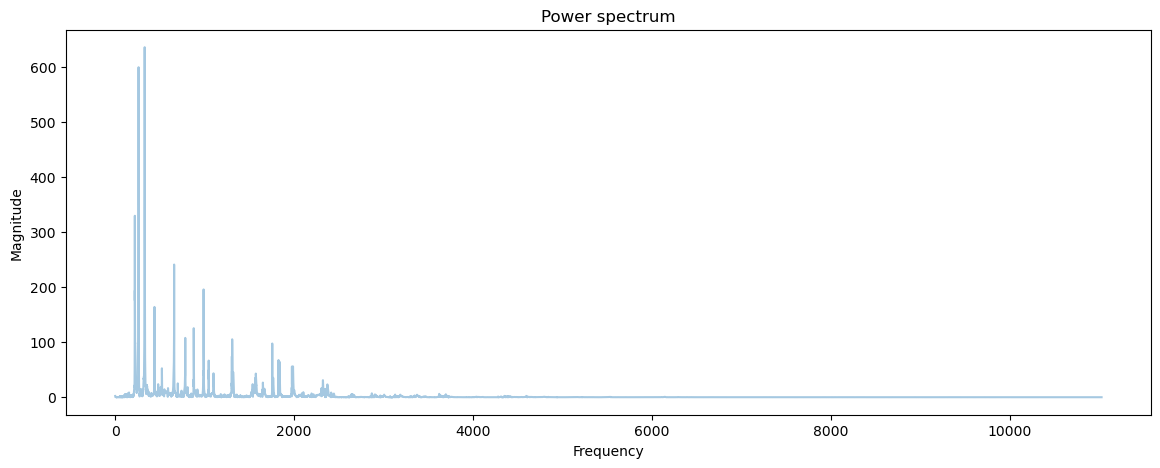

In [4]:
# We apply a Fast Fourier Transform (FFT) to extract information from the sound.

fft = np.fft.fft(data)

# calculate abs value to get magnitude
spectrum = np.abs(fft)

# create frequency variable
f = np.linspace(0, sample_rate, len(spectrum))

# take half of the spectrum and frequency because with the fft we will get a mirror diagram so we take only the half 
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

# plot spectrum
plt.figure(figsize=(14,5))
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

Text(0.5, 1.0, 'Spectrogram')

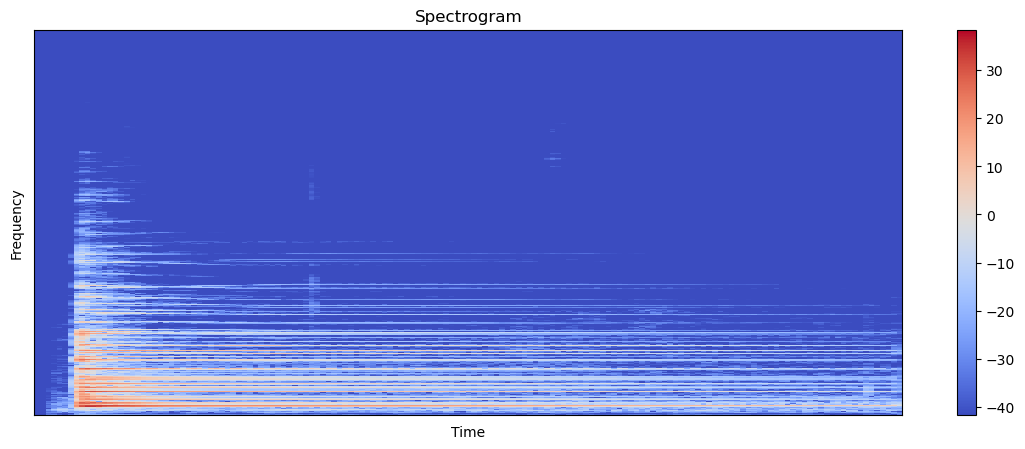

In [5]:
# We applied STFT to add temporal dimension to the graph.
 
hop_length = 512 # how many sample we move between each step
n_fft = 2048 # how many samples to take for each fft step

# perform stft
stft = librosa.stft(data, n_fft=n_fft, hop_length=hop_length)

# calculate abs value to get magnitude
spectrogram = np.abs(stft)
# Tranforming the values of spectrogram to Dicibel
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# display spectrogram
plt.figure(figsize=(14,5))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")
